# Modelagem Completa do RC ativo + Sallen-Key
 
 - Considerando nossa entrada como $v_i(t)$ do filtro RC passa-baixa ativo;
 - Conectando a saída do filtro RC passa-baixa ativo $V_{C_3}(t)$ na entrada do filtro passa-baixa Sallen-key;
 - Considerando nossa saída global como $v_{C_2}(t)$
 - Considerando nossos estados globais como $v_{C_1}(t)$, $v_{C_2}(t)$ e $v_{C_3}(t)$.
 
 Referência para a interconexão de sistemas: <<http://www.diag.uniroma1.it/~lanari/ControlSystems/CS%20-%20Lectures/2014_Lec_12_Interconnected_Systems.pdf>>

Considerando o bloco com índices 1 como sendo o filtro RC passa-baixa ativo e o bloco com índices 2 como sendo o filtro Sallen-Key passa-baixa.

$$
    \dot{x_1} = 
    \begin{bmatrix}
        \frac{-1}{R_3 C_3}
    \end{bmatrix}x_1
    +
    \begin{bmatrix}
        0 \\
        \frac{1}{R_3 C_3}
    \end{bmatrix}u_1
$$


$$
    y_1 = 
    \begin{bmatrix}
        1 \\
    \end{bmatrix}x_1
    +
    \begin{bmatrix}
        0 \\
    \end{bmatrix}u_1
$$


$$
    \dot{x_2} = 
    \begin{bmatrix}
        0 & \frac{1}{R_2 C_1} \\
        \frac{-1}{R_1 C_2} & -\left( \frac{1}{R_1 C_2} + \frac{1}{R_2 C_2} \right)
    \end{bmatrix}x_2
    +
    \begin{bmatrix}
        0 \\
        \frac{1}{R_1 C_2}
    \end{bmatrix}u_2
$$

$$
    y_2 = 
    \begin{bmatrix}
        1 & 0 \\
    \end{bmatrix}x_2
    +
    \begin{bmatrix}
        0
    \end{bmatrix}u_2
$$

Se $u_2 = y_1$:

$$
    \dot{x} = 
    \begin{bmatrix}
        \frac{-1}{R_3 C_3} & 0 & 0 \\
        0 & 0 & \frac{1}{R_2 C_1} \\
        \frac{1}{R_1 C_2} & \frac{-1}{R_1 C_2} & -\left( \frac{1}{R_1 C_2} + \frac{1}{R_2 C_2} \right) \\
    \end{bmatrix}x
    +
    \begin{bmatrix}
        \frac{1}{R_3 C_3} \\
        0 \\
        0 \\
    \end{bmatrix}u
$$

$$
    y = 
    \begin{bmatrix}
        0 & 1 & 0 \\
    \end{bmatrix}x
    +
    \begin{bmatrix}
        0
    \end{bmatrix}u
$$

Vamos reorganizar nossa matriz para facilitar no projeto do observador de estados, mantendo o estado $x_1$ como nosso estado a ser medido (e não observado) $v_{C_1}$, e para ficar mais intuitivo, podemos fazer o estado $x_2$ coincidir com $v_{C_2}$ e $x_3$ com $v_{C_3}$.

Para tal, podemos trocar as posições da primeira e terceira linhas/colunas de todas as matrizes e consequentemente trocar as posições da primeira e e segunda, ficando com:

$$
    \dot{x} = 
    \begin{bmatrix}
        \dot{x_1} \\
        \dot{x_2} \\
        \dot{x_3} \\
    \end{bmatrix} = 
    \begin{bmatrix}
        \dot{v_{C_1}} \\
        \dot{v_{C_2}} \\
        \dot{v_{C_3}} \\
    \end{bmatrix} =
    \overbrace{
        \begin{bmatrix}
            0 & \frac{1}{R_2 C_1} & 0 \\
            \frac{-1}{R_1 C_2} & -\left( \frac{1}{R_1 C_2} + \frac{1}{R_2 C_2} \right) & \frac{1}{R_1 C_2} \\
            0 & 0 & \frac{-1}{R_3 C_3}
        \end{bmatrix}}^{A} x
    +
    \overbrace{
        \begin{bmatrix}
            0 \\
            0 \\
            \frac{1}{R_3 C_3}
        \end{bmatrix}}^{B} u
$$

$$
    y = 
    \overbrace{
        \begin{bmatrix}
            1 & 0 & 0 \\
        \end{bmatrix}}^{C} x
    +
    \overbrace{
        \begin{bmatrix}
            0
        \end{bmatrix}}^{D} u
$$

 
Então podemos definir uma matrizes de legendas para manter as referências sobre o significado de cada estado: 

In [2]:
# REFERENCIA DOS ESTADOS
import numpy as np
u_label = np.matrix(['v_i(t)'])
y_label = np.matrix(['v_C_1(t)'])
x_label = np.matrix(
    [['v_C_1(t)'], 
     ['v_C_2(t)'], 
     ['v_C_3(t)']]
)

print(f'u =\n{u_label}')
print(f'y =\n{y_label}')
print(f'x =\n{x_label}')

u =
[['v_i(t)']]
y =
[['v_C_1(t)']]
x =
[['v_C_1(t)']
 ['v_C_2(t)']
 ['v_C_3(t)']]


In [19]:
# MODELAGEM DA PLANTA
import control
from decimal import Decimal

# Valores dos Componentes
R_1 = 68e3
R_2a = 33e3
R_2b = 39e3
R_2 = (R_2a * R_2b) / (R_2a + R_2b)
R_3 = 10e3
C_1 = 100e-9
C_2 = 7 * 100e-9
C_3a = 100e-9
C_3b = 100e-9
C_3c = 100e-9
C_3 = (C_3a * C_3b) / (C_3a + C_3b) + C_3c

print('Valores nominais dos componentes:')
print(f'R_1 = {Decimal(str(R_1)).to_eng_string()} Ohms')
print(f'R_2 = {Decimal(str(R_2)).to_eng_string()} Ohms')
print(f'R_3 = {Decimal(str(R_3)).to_eng_string()} Ohms')
print(f'C_1 = {Decimal(str(C_1)).to_eng_string()} F')
print(f'C_2 = {Decimal(str(C_2)).to_eng_string()} F')
print(f'C_3 = {Decimal(str(C_3)).to_eng_string()} F')

A = np.matrix(
    [[0, 1 / (R_2 * C_1), 0], 
     [-1 / (R_1 * C_2), -((1 / (R_1 * C_2)) + (1 / (R_2 * C_2))), 1 / (R_1 * C_2)],
     [0, 0, -1 / (R_3 * C_3)]]
)
B = np.matrix(
    [[0], 
     [0], 
     [1 / (R_3 * C_3)]]
)
C = np.matrix([1, 0, 0])
D = np.matrix([0])

sys = control.ss(A, B, C, D)

print(f'\nsys = \n{sys}')

Valores nominais dos componentes:
R_1 = 68000.0 Ohms
R_2 = 17875.0 Ohms
R_3 = 10000.0 Ohms
C_1 = 100E-9 F
C_2 = 700E-9 F
C_3 = 150E-9 F

sys = 
A = [[   0.          559.44055944    0.        ]
 [ -21.00840336 -100.92848328   21.00840336]
 [   0.            0.         -666.66666667]]

B = [[  0.        ]
 [  0.        ]
 [666.66666667]]

C = [[1. 0. 0.]]

D = [[0.]]



## Reposta ao Degrau unitário
Podemos aplicar um degrau unitário e obter a resposta para cada saída e cada estado do sistema:

_____Eigenvalue______ Damping___ Frequency_
    -50.46    +95.95j     0.4655      108.4
    -50.46    -95.95j     0.4655      108.4
    -666.7                     1      666.7
f0 = 17.25415241399785 Hz


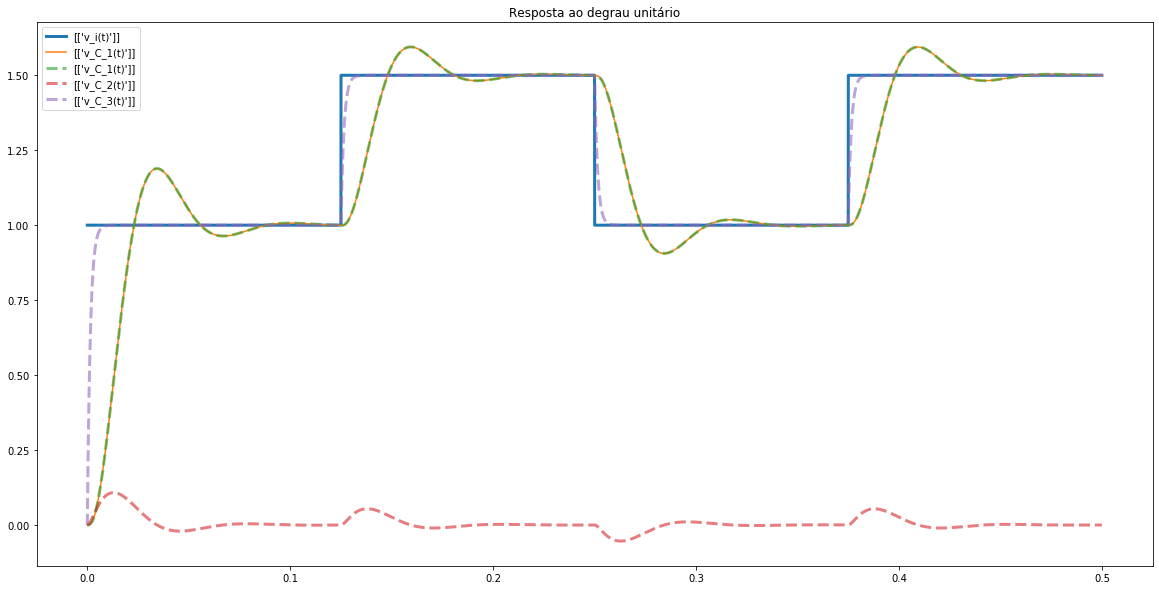

In [20]:
# RESPOSTA AO DEGRAU UNITARIO
import matplotlib.pyplot as plt

# Identifica parâmetros do sistema
wn, zeta, poles = control.damp(sys)
fn = wn / (2 * np.pi)
f0 = min(fn)
print(f'f0 = {f0} Hz')

# Cria sinal arbitrário de entrada
Ts = 2e-5
pulse_time = 250e-3
pulse_cycles = 2
T = np.arange(pulse_time * pulse_cycles / Ts) * Ts
kmax = T.size
U = np.array([
    *[
        *np.ones(int(np.ceil(kmax / (2 * pulse_cycles)))),
        *np.ones(int(np.ceil(kmax / (2 * pulse_cycles)))) * 1.5
    ] * pulse_cycles
])
U = U[0:kmax]

# Simula o sistema aplicando o sinal arbitrário na entrada
T, yout, xout = control.forced_response(sys, T, U)

# Plota
plt.figure(figsize=(20, 10))
plt.plot(T, U, label=u_label[0], lw=3)
plt.plot(T, yout, label=y_label[0])
plt.plot(T, xout[0], label=x_label[0], lw=3, ls='--', alpha=0.6)
plt.plot(T, xout[1], label=x_label[1], lw=3, ls='--', alpha=0.6)
plt.plot(T, xout[2], label=x_label[2], lw=3, ls='--', alpha=0.6)
plt.title('Resposta ao degrau unitário')
plt.legend();
plt.savefig('imgs/step_response_openloop.png', dpi=300)

# Simulação em Malha Aberta (implementação recursiva)

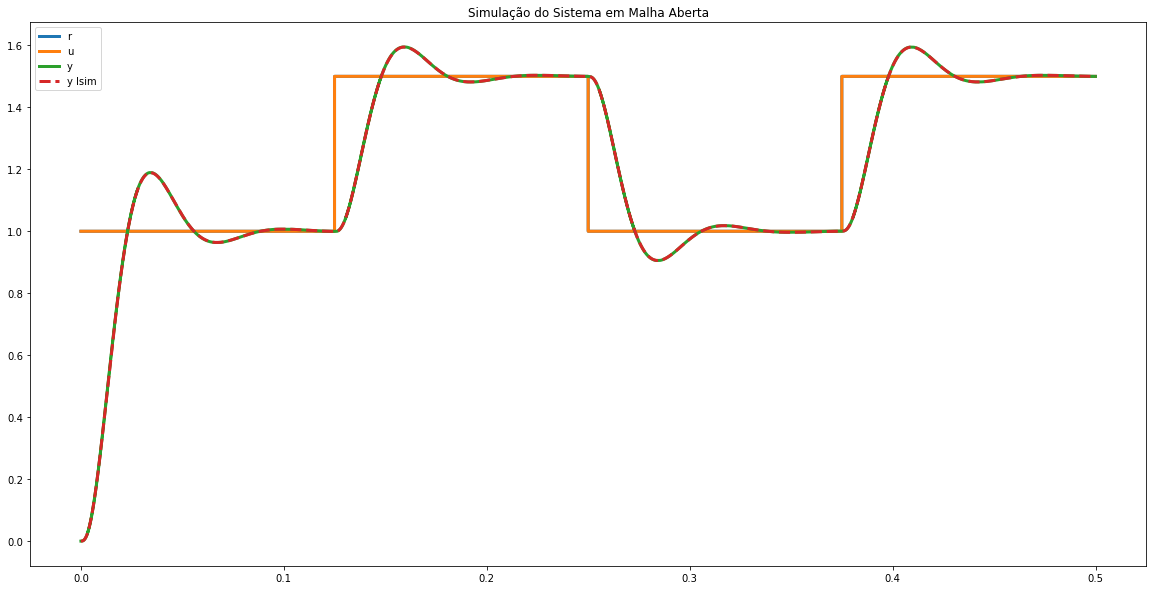

In [21]:
# Variáveis para armazenar as amostras para plotagem
r_ = U
u_ = np.zeros(len(r_))
x_ = np.zeros([len(r_),len(A)])
y_ = np.zeros(len(r_))

# Variáveis para simulação do sistema
r = 0
u = 0
x = np.zeros([len(A),1])
xdot = 0
Tsx = Ts
y = 0
k = 0

while k < len(r_):
    ## ENTRADAS
    r = r_[k]  # leitura da referência
    
    ## CONTROLE
    u = r        # sem controlador
    
    ## PLANTA
    x = x + Tsx * xdot
    y = C*x + D*u
    xdot = A*x + B*u
        
    ## SAÍDAS
    x_[k][:] = x[0]
    u_[k] = u
    y_[k] = y
    
    ## RECICLO
    k += 1
    
# PlOTS
plt.figure(figsize=(20,10))
plt.step(T, r_, lw=3, label='r')
plt.step(T, u_, lw=3, label='u')
plt.step(T, y_, lw=3, label='y')
plt.plot(T, yout, lw=3, label='y lsim', ls='--')
plt.title('Simulação do Sistema em Malha Aberta')
plt.legend();

# Destroi variaveis utilizadas
del r_, u_, x_, y_
del r, u, x, y, xdot, Tsx, k
plt.savefig('imgs/step_response_recursive_openloop.png', dpi=300)

# Projeto do Controlador
Especificações mínimas da resposta ao degrau:
Degrau de referência de 1,0 à 1,5 V:
- Ts5% e Mp com metade do valor obtido em malha aberta;  
- Erro nulo em regime permanente para resposta ao degrau;  
- Estabilidade.

In [6]:
# PROJETO DO CONTROLADOR
import import_ipynb
from mycontrol import myfom as FOM
from mycontrol import mystepinfo as STEPINFO
SettlingTimeThreshold = 0.05

# Controlabilidade
if control.ctrb(A, B).shape == (len(A), len(A)):
    print('OK, o sistema é controlável')

# Adquirindo parâmetros da planta
S = STEPINFO(sys, T, SettlingTimeThreshold)
print(f'S: {json.dumps(S, indent=4)}')
S_fom = FOM(S, SettlingTimeThreshold)
print(f'S_fom: {json.dumps(S_fom, indent=4)}')

# Requisitos Mínimos
ReqMin = {
    'SettlingTime': S['SettlingTime'] / 2,
    'Overshoot': S['Overshoot'] / 2,
}
print(f'ReqMin: {json.dumps(ReqMin, indent=4)}')

# Requisitos para o Projeto
Req = {
    'SettlingTime': S['SettlingTime'] / 2,
    'Overshoot': S['Overshoot'] / 2,
}
print(f'Req: {json.dumps(Req, indent=4)}')
Req_fom = FOM(Req, SettlingTimeThreshold)
print(f'Req_fom: {json.dumps(Req_fom, indent=4)}')

# Polos dominantes para atender o requisito
p1 = -Req_fom['zeta'] * Req_fom['wn'] + 1j * Req_fom['wn'] * np.sqrt(
    1 - Req_fom['zeta']**2)

importing Jupyter notebook from mycontrol.ipynb
OK, o sistema é controlável
S: {
    "RiseTime": 0.0148,
    "SettlingTime": 0.050100000000000006,
    "SettlingMin": 0.900528083144963,
    "SettlingMax": 1.1888477338705852,
    "Overshoot": 18.884773385507415,
    "Undershoot": 0.0,
    "Peak": 1.1888477338705852,
    "PeakTime": 0.03436,
    "SteadyStateValue": 1.0000000000130471
}
S_fom: {
    "zeta": 0.468682170855478,
    "wn": 103.50363716907147,
    "Fn": 650.3325323003568,
    "wd": 91.43168374824775,
    "Fd": 574.4822119376809
}
ReqMin: {
    "SettlingTime": 0.025050000000000003,
    "Overshoot": 9.442386692753708
}
Req: {
    "SettlingTime": 0.025050000000000003,
    "Overshoot": 9.442386692753708
}
Req_fom: {
    "zeta": 0.60061338273463,
    "wn": 213.98294063103302,
    "Fn": 1344.4944685599883,
    "wd": 171.08783375693034,
    "Fd": 1074.9765632987283
}


## Estudos de estratégias para escolha dos outros polos

Running........................................................................................

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:162: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.



Estratégia Escolhida N: 54:


{'INFO': {'RiseTime': 0.01378,
  'SettlingTime': 0.022400000000000003,
  'SettlingMin': 0.9000469622661381,
  'SettlingMax': 1.0288592931436875,
  'Overshoot': 2.885929314378735,
  'Undershoot': 0.0,
  'Peak': 1.0288592931436875,
  'PeakTime': 0.029960000000000004,
  'SteadyStateValue': 0.999999999999903},
 'FOM': {'zeta': 0.7484363099978679,
  'wn': 158.10994112846737,
  'Fn': 993.4340590174155,
  'wd': 104.85956787682888,
  'Fd': 658.8520962008918},
 'j': array([-128.52101782+171.08783376j, -128.52101782-171.08783376j,
        -257.04203564  +1.71087834j, -257.04203564  -1.71087834j]),
 'factor': 100,
 'desc': ' \nEstratégia: utilizar o segundo e terceiro polos como par complexo\nconjugado, reduzindo a parte imaginária pelo fator e dobrando a parte real.\n'}

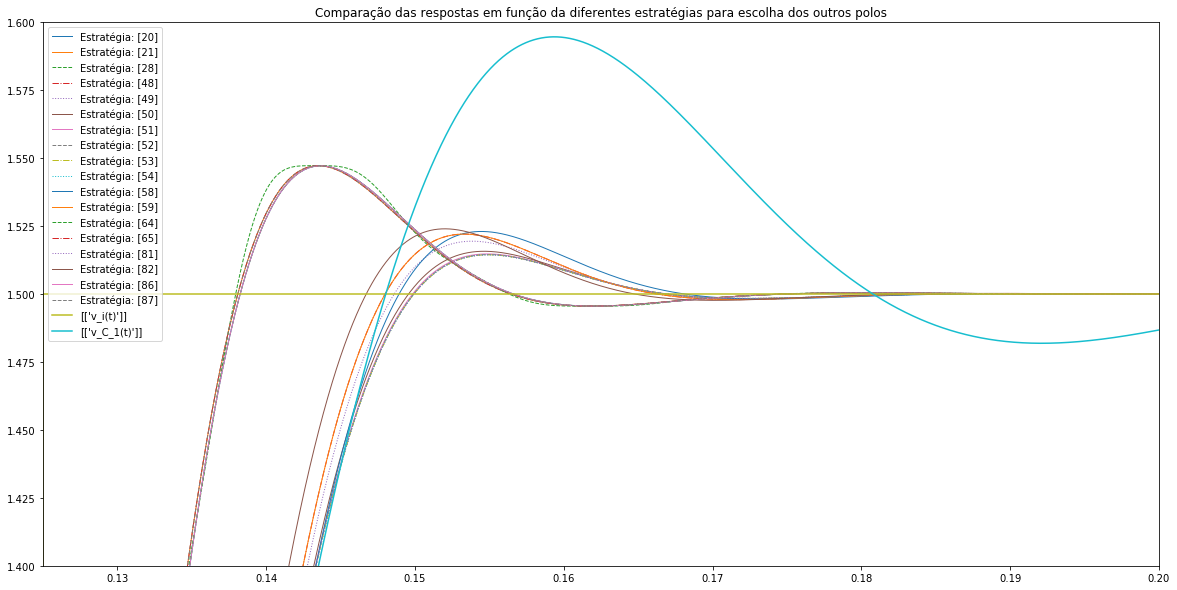

In [62]:
## Estratégias

from itertools import cycle

estrategias = list()

estrategia = {
    'INFO': None, 
    'FOM': None, 
    'j': None,
    'factor': None,
    'desc': None,
}

factors = [0.1, 1, 1.5, 1.6, 2, 2.5, 5, 10, 20, 50, 100]

for factor in factors:
    p2 = factor * p1
    estrategia['j'] = np.array([p1, p1.conjugate(), p2, p2.conjugate()])
    estrategia['factor'] = factor
    estrategia['desc'] = ''' 
Estratégia: utilizar o segundo e terceiro polos como par complexo
conjugado, ampliando a parte real e imaginária.
'''
    estrategias.append(estrategia.copy())

for factor in factors:
    p2 = factor * np.real(p1) + np.imag(p1)*1j
    estrategia['j'] = np.array([p1, p1.conjugate(), p2, p2.conjugate()])
    estrategia['factor'] = factor
    estrategia['desc'] = ''' 
Estratégia: utilizar o segundo e terceiro polos como par complexo
conjugado, ampliando a parte real mas mantendo a mesma posição da parte 
imaginária.
'''
    estrategias.append(estrategia.copy())

for factor in factors:
    p2 = np.real(p1) + factor * np.imag(p1)*1j
    estrategia['j'] = np.array([p1, p1.conjugate(), p2, p2.conjugate()])
    estrategia['factor'] = factor
    estrategia['desc'] = ''' 
Estratégia: utilizar o segundo e terceiro polos como par complexo
conjugado, ampliando a parte imaginária mas mantendo a mesma posição da parte 
real.
'''
    estrategias.append(estrategia.copy())

for factor in factors:
    p2 = np.real(p1) + np.imag(p1)*1j / factor
    estrategia['j'] = np.array([p1, p1.conjugate(), p2, p2.conjugate()])
    estrategia['factor'] = factor
    estrategia['desc'] = ''' 
Estratégia: utilizar o segundo e terceiro polos como par complexo
conjugado, reduzindo a parte imaginária mas mantendo a mesma posição da parte 
real.
'''
    estrategias.append(estrategia.copy())

for factor in factors:
    p2 = 2 * np.real(p1) + np.imag(p1)*1j / factor
    estrategia['j'] = np.array([p1, p1.conjugate(), p2, p2.conjugate()])
    estrategia['factor'] = factor
    estrategia['desc'] = ''' 
Estratégia: utilizar o segundo e terceiro polos como par complexo
conjugado, reduzindo a parte imaginária pelo fator e dobrando a parte real.
'''
    estrategias.append(estrategia.copy())
    
for factor in factors:
    p2 = factor * np.real(p1) + (1./factor) * np.imag(p1)*1j
    estrategia['j'] = np.array([p1, p1.conjugate(), p2, p2.conjugate()])
    estrategia['factor'] = factor
    estrategia['desc'] = ''' 
Estratégia: utilizar o segundo e terceiro polos como par complexo
conjugado, reduzindo a parte imaginária e ampliando a parte real pelo mesmo fator.
'''
    estrategias.append(estrategia.copy())

for factor in factors:
    p2 = (1. / factor) * np.real(p1) + factor * np.imag(p1)*1j
    estrategia['j'] = np.array([p1, p1.conjugate(), p2, p2.conjugate()])
    estrategia['factor'] = factor
    estrategia['desc'] = ''' 
Estratégia: utilizar o segundo e terceiro polos como par complexo
conjugado, ampliando a parte imaginária e reduzindo a parte real.
'''
    estrategias.append(estrategia.copy())

for factor in factors:
    p2 = factor * np.real(p1)
    p3 = 1.001 * p2
    estrategia['j'] = np.array([p1, p1.conjugate(), p2, p3])
    estrategia['factor'] = factor
    estrategia['desc'] = ''' 
Estratégia: utilizar o segundo e terceiro polos como polos reais
quase idênticos afastados da posição da parte real do par de polos complexos.
'''
    estrategias.append(estrategia.copy())

# Escolhendo menor Overshoot
estrategia_escolhida = None
figura_de_escolha = S["Overshoot"]
search_verbose = False

# Estilo cíclico
lines = ["solid", "-", "--", "-.", ":"]
linecycler = cycle(lines)

# PLOT de comparação da resposta do sistema equivalente
plt.figure(figsize=(20, 10))
print("Running", end='')
indice_escolhido = 0
for indice, estrategia in enumerate(estrategias):
    G = control.tf(1, np.poly(estrategia['j']))
    G = G / np.float(control.dcgain(G))
    
    _, yout_test_G, _ = control.forced_response(G, T, U)
    
    try:
        S = STEPINFO(G, T, SettlingTimeThreshold)
    except:
        pass
    else:
        S_fom = FOM(S, SettlingTimeThreshold)
        
        estrategia['INFO'] = S
        estrategia['FOM'] = S_fom
        
        print('.',end='')

        # Se é estável e está dentro dos requisitos
        if not np.isnan(S_fom['Fn']):
            if S["SettlingTime"] <= Req["SettlingTime"]:
                if S["Overshoot"] <= Req["Overshoot"]:
                    
                    plt.plot(T,
                             yout_test_G,
                             label=f"Estratégia: [{indice}]",
                             lw=1, 
                             linestyle=next(linecycler))
                    if search_verbose:
                        print(f'\nEstratégia: {indice} atende os requisitos:')
                        control.damp(G)
                        print(f'\t"SettlingTime": {S["SettlingTime"]},')
                        print(f'\t"Overshoot": {S["Overshoot"]},')
                        print(f'\t"zeta": {S_fom["zeta"]},')
                        print(f'\t"wn": {S_fom["wn"]},')
                    
                    if S["Overshoot"] < figura_de_escolha:
                        figura_de_escolha = S["Overshoot"]
                        estrategia_escolhida = estrategia.copy()
                        indice_escolhido = indice

plt.plot(T, U, label=u_label[0])
plt.plot(T, yout, label=y_label[0])
plt.title('Comparação das respostas em função da diferentes estratégias \
para escolha dos outros polos')
plt.xlim([0.125, 0.2])
plt.ylim([1.4, 1.6])
plt.legend();
plt.savefig('imgs/strategies_comparison.png', dpi=300)

j = estrategia_escolhida['j']
print(f'\nEstratégia Escolhida N: {indice_escolhido}:')
estrategia_escolhida

Ahat_c =
[[   0.          559.44055944    0.            0.        ]
 [ -21.00840336 -100.92848328   21.00840336    0.        ]
 [   0.            0.         -666.66666667    0.        ]
 [  -1.            0.            0.            0.        ]]
Bhat_c =
[[  0.        ]
 [  0.        ]
 [666.66666667]
 [  0.        ]]
Chat_c =
[[1. 0. 0. 0.]]
Dhat_c =
[[0]]
Khat_c =
[[ 4.16654212e+00  1.17530446e+01  5.29643546e-03 -3.86126945e+02]]
K =
[[4.16654212e+00 1.17530446e+01 5.29643546e-03]]
Ki = 
386.12694507724626
polos projeto: [-128.52101782+171.08783376j -128.52101782-171.08783376j
 -257.04203564  +1.71087834j -257.04203564  -1.71087834j]
polos controlado: [-128.52101782+171.08783376j -128.52101782-171.08783376j
 -257.04203564  +1.71087834j -257.04203564  -1.71087834j]
sys_c=
A = [[ 0.00000000e+00  5.59440559e+02  0.00000000e+00  0.00000000e+00]
 [-2.10084034e+01 -1.00928483e+02  2.10084034e+01  0.00000000e+00]
 [-2.77769475e+03 -7.83536306e+03 -6.70197624e+02  2.57417963e+05]
 [-1.00000

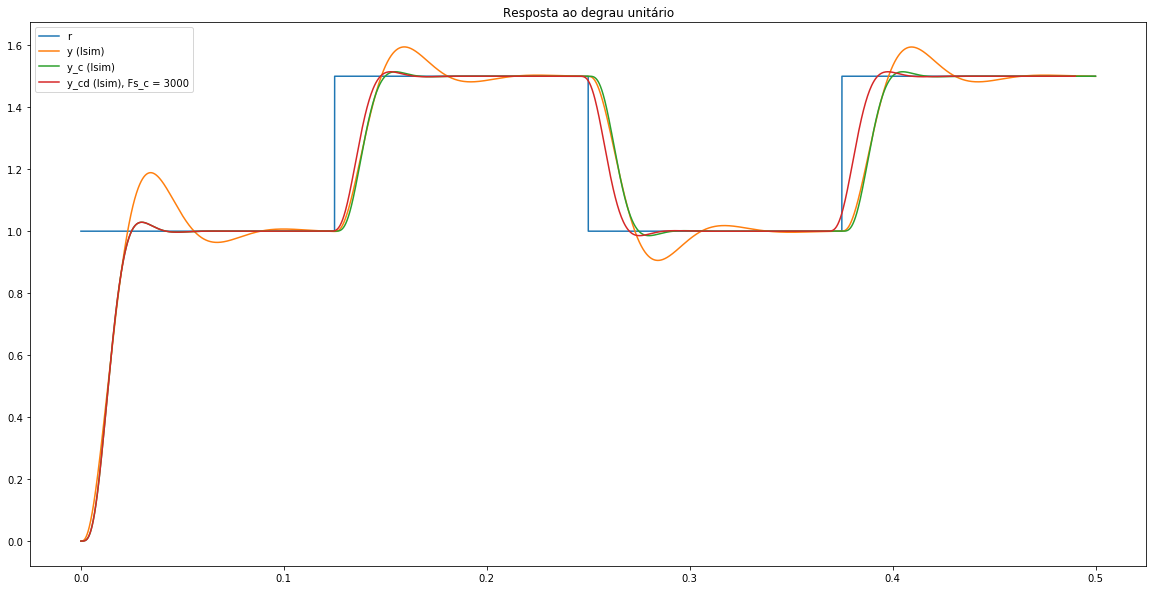

In [79]:
## Controlador
Ahat_c = np.vstack(
    (np.hstack((A, np.zeros([len(A), 1]))),
     np.hstack((-C, np.zeros([1, 1]))))
)
Bhat_c = np.vstack((B, 0))
Chat_c = np.hstack((C, np.zeros([1,1])))
Dhat_c = D

print(f'Ahat_c =\n{Ahat_c}')
print(f'Bhat_c =\n{Bhat_c}')
print(f'Chat_c =\n{Chat_c}')
print(f'Dhat_c =\n{Dhat_c}')

# Matriz de ganhos do Controlador
Khat_c = control.acker(Ahat_c, Bhat_c, j)
print(f'Khat_c =\n{Khat_c}')

K = np.matrix(Khat_c[0,:-1])
Ki = -Khat_c[0,-1]
print(f'K =\n{K}')
print(f'Ki = \n{Ki}')

# Verificando a posição dos polos:
print(f'polos projeto: {j}')
print(f'polos controlado: {np.linalg.eig(Ahat_c -Bhat_c * Khat_c)[0]}')

# Simulação do controlador
AA_c = Ahat_c -Bhat_c * Khat_c
BB_c = np.vstack((
    np.zeros([len(A),1]),
    [1]
))
CC_c = np.hstack((C, [[0]]))
DD_c = D

sys_c = control.ss(AA_c, BB_c, CC_c, DD_c)
print(f'sys_c=\n{sys_c}')

# Simula o sistema aplicando o sinal arbitrário na entrada
T, yout_c, xout_c = control.forced_response(sys_c, T, U)

# Digitaliza o sinal U e o controlador
Fs_c = int(round( (Req_fom['Fn'] * 2) / 1000.0) * 1000.0)
Ts_c = 1 / Fs_c
Ud = U[::int(np.ceil(Ts_c / Ts))]
sys_cd = sys_c.sample(Ts_c, method='zoh')
print(f'Frequência escolhida para o controlador = Fs_c = {Fs_c}')

# Simula sistema digitalizado na frequência Fs_c
Td, yout_cd, xout_cd = control.forced_response(sys_cd, U=Ud)

# Plota
plt.figure(figsize=(20, 10))
plt.plot(T, U, label='r')
plt.plot(T, yout, label='y (lsim)')
plt.plot(T, yout_c, label='y_c (lsim)')
plt.plot(Td, yout_cd[0], label=f'y_cd (lsim), Fs_c = {Fs_c}')
plt.title('Resposta ao degrau unitário')
plt.legend(); 
plt.savefig('imgs/step_response_closedloop.png', dpi=300)

# Simulação em Malha Fechada Sem Observador (implementação recursiva)

Ts = 2e-05
Tsx = 2e-05
Tse = 0.0003333333333333333
k_tse = Tse/Ts = 16.666666666666664
Ts_/Ts = 25000.00000001092 = k = 25000
ctrl_act = 1471 = k/k_tse = 1500.0000000000002


/usr/lib/python3.7/site-packages/ipykernel_launcher.py:74: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:87: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


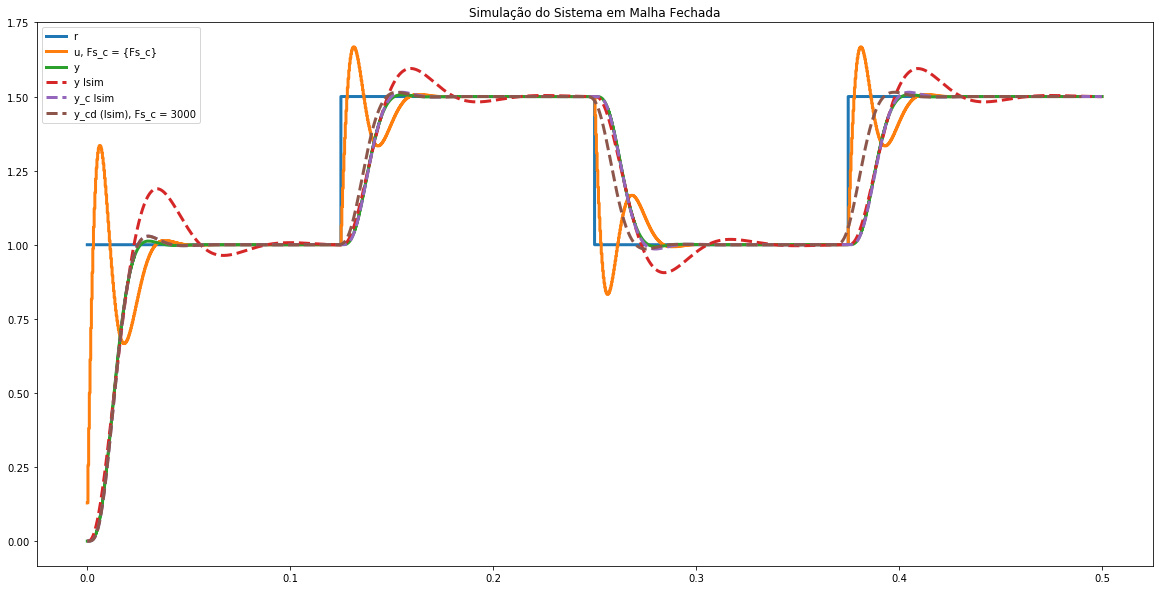

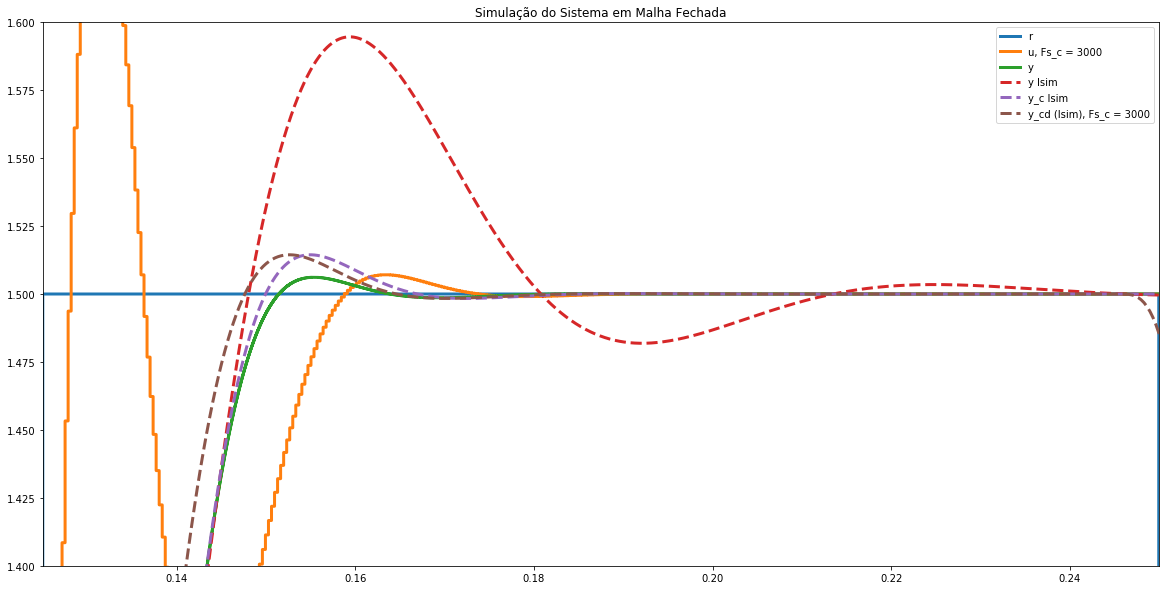

In [81]:
# Variáveis para armazenar as amostras para plotagem
r_ = U
u_ = np.zeros(len(r_))
x_ = np.zeros([len(r_),len(A)])
y_ = np.zeros(len(r_))

# Variáveis para simulação do sistema
r = 0.0
u = 0.0
x = np.zeros([len(A),1])
xdot = 0.0
Tsx = Ts
y = 0.0
e = 0.0
edot = 0.0
Tse = Ts_c
k = 0

Ts_ = 0
print(f'Ts = {Ts}')
print(f'Tsx = {Tsx}')
print(f'Tse = {Tse}')

# Divisor de clock para o Amostrador do Controlador
k_tse = Tse / Ts
k_clk_e = k_tse
print(f'k_tse = Tse/Ts = {k_tse}')

# Quantas vezes ocorreram ações de controle na simulação?
ctrl_act = 0

while k < len(r_):
    ## ENTRADAS
    r = r_[k]  # leitura da referência
    
    ## CONTROLE
    if(k_clk_e >= k_tse):
        edot = r - y
        e = e + Tse * edot
        u = e * Ki - K * x
        
        # reciclo do divisor de clock do controle
        k_clk_e = 0
        ctrl_act += 1
    
    ## PLANTA
    xdot = A*x + B*u
    x = x + Tsx * xdot
    y = C*x + D*u
        
    ## SAÍDAS
    x_[k][:] = x[0]
    u_[k] = u
    y_[k] = y
    
    ## RECICLO DA SIMULAÇÃO
    k += 1
    k_clk_e += 1
    Ts_ += Ts

print(f'Ts_/Ts = {Ts_/Ts} = k = {k}')
print(f'ctrl_act = {ctrl_act} = k/k_tse = {k/k_tse}')
    
# PlOTS
plt.figure(figsize=(20,10))
plt.step(T, r_, lw=3, label='r')
plt.step(T, u_, lw=3, label='u, Fs_c = {Fs_c}')
plt.step(T, y_, lw=3, label='y')
plt.plot(T, yout, lw=3, label='y lsim', ls='--')
plt.plot(T, yout_c, lw=3, label='y_c lsim', ls='--')
plt.plot(Td, yout_cd[0], lw=3, label=f'y_cd (lsim), Fs_c = {Fs_c}', ls='--')
plt.title('Simulação do Sistema em Malha Fechada')
plt.legend();
plt.savefig('imgs/step_response_recursive_closedloop.png', dpi=300)

plt.figure(figsize=(20,10))
plt.step(T, r_, lw=3, label='r')
plt.step(T, u_, lw=3, label=f'u, Fs_c = {Fs_c}')
plt.step(T, y_, lw=3, label='y')
plt.plot(T, yout, lw=3, label='y lsim', ls='--')
plt.plot(T, yout_c, lw=3, label='y_c lsim', ls='--')
plt.plot(Td, yout_cd[0], lw=3, label=f'y_cd (lsim), Fs_c = {Fs_c}', ls='--')
plt.title('Simulação do Sistema em Malha Fechada')
plt.legend();
plt.xlim([0.125, 0.25])
plt.ylim([1.4, 1.6])
plt.savefig('imgs/step_response_recursive_closedloop_zoom.png', dpi=300)

# Destroi variaveis utilizadas
del r_, u_, x_, y_
del r, u, x, y, e, xdot, edot, Tsx, Tse, k

# Projeto do Observador de Ordem Mínima

In [73]:
## Obsevador

# Observabilidade
if control.obsv(A, C).shape == (len(A), len(A)):
    print('OK, o sistema é observável')

# Polos para o Observador
l = np.array([np.real(p1), np.real(p1)]) * 2
print(f'Polos do controlador: l =\n{l}')

Aaa = A[0, 0]
Aab = A[0, 1:]
Aba = A[1:, 0]
Abb = A[1:, 1:]
Ba = B[0, 0]
Bb = B[1:, 0]

print(f'Aaa =\n{Aaa}')
print(f'Aab =\n{Aab}')
print(f'Aab.T =\n{Aab.T}')
print(f'Aba =\n{Aba}')
print(f'Abb =\n{Abb}')
print(f'Abb.T =\n{Abb.T}')
print(f'Ba =\n{Ba}')
print(f'Bb =\n{Bb}')

Ke = np.matrix(control.acker(Abb.T, Aab.T, l)).T
print(f'Ke =\n{Ke}')

Ahat_o = np.matrix(Abb - Ke * Aab)
Bhat_o = np.matrix((Ahat_o * Ke) + (Aba - (Ke * Aaa)))
Chat_o = np.matrix(np.vstack((
    np.zeros(np.linalg.matrix_rank(A) -1),
    np.eye(np.linalg.matrix_rank(A) -1)
)))
Dhat_o = np.matrix(np.vstack((1, Ke)))
Fhat_o = np.matrix(Bb - Ke * Ba)

print(f'Ahat_o =\n{Ahat_o}')
print(f'Bhat_o =\n{Bhat_o}')
print(f'Chat_o =\n{Chat_o}')
print(f'Dhat_o =\n{Dhat_o}')
print(f'Fhat_o =\n{Fhat_o}')

OK, o sistema é observável
Polos do controlador: l =
[-257.04203564 -257.04203564]
Aaa =
0.0
Aab =
[[559.44055944   0.        ]]
Aab.T =
[[559.44055944]
 [  0.        ]]
Aba =
[[-21.00840336]
 [  0.        ]]
Abb =
[[-100.92848328   21.00840336]
 [   0.         -666.66666667]]
Abb.T =
[[-100.92848328    0.        ]
 [  21.00840336 -666.66666667]]
Ba =
0.0
Bb =
[[  0.        ]
 [666.66666667]]
Ke =
[[-0.45315105]
 [14.27661111]]
Ahat_o =
[[  152.58259539    21.00840336]
 [-7986.91530517  -666.66666667]]
Bhat_o =
[[  209.77743764]
 [-5898.46165694]]
Chat_o =
[[0. 0.]
 [1. 0.]
 [0. 1.]]
Dhat_o =
[[ 1.        ]
 [-0.45315105]
 [14.27661111]]
Fhat_o =
[[  0.        ]
 [666.66666667]]


# Simulação com Observador (implementação recursiva)
- Considerando um ruído na saída da planta de 100mV
- Aplicando quantização do ADC
- Aplicando quantização do DAC
- Aplicando amostragem do observador
- Aplicando amostragem do controlador
- Planta simulada em tempo contínuo, com seu integrador com o mesmo time-step da simulação
- Plotando a saída controlada, contendo a ação de controle, comparando com a saída da simulação lsim para malha aberta e fechada (sem controlador) com o controlador contínuo e amostrado.
- Plotando comparação entre os estados observados, os estados da planta e os estados da simulação lsim


Ts = 2e-05
Tsx = 2e-05
Tse = 0.0003333333333333333
Tsn = 0.00016666666666666666
controller_clock_trigger = Tse/Ts = 16.666666666666664
observer_clock_trigger = Tsn/Ts = 8.333333333333332
Ts_/Ts = 25000.00000001092 = k = 25000
controller_action_counter = 1471 = k/controller_clock_trigger = 1500.0000000000002
observer_action_counter = 2778 = k/observer_clock_trigger = 3000.0000000000005


/usr/lib/python3.7/site-packages/ipykernel_launcher.py:202: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:221: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:240: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


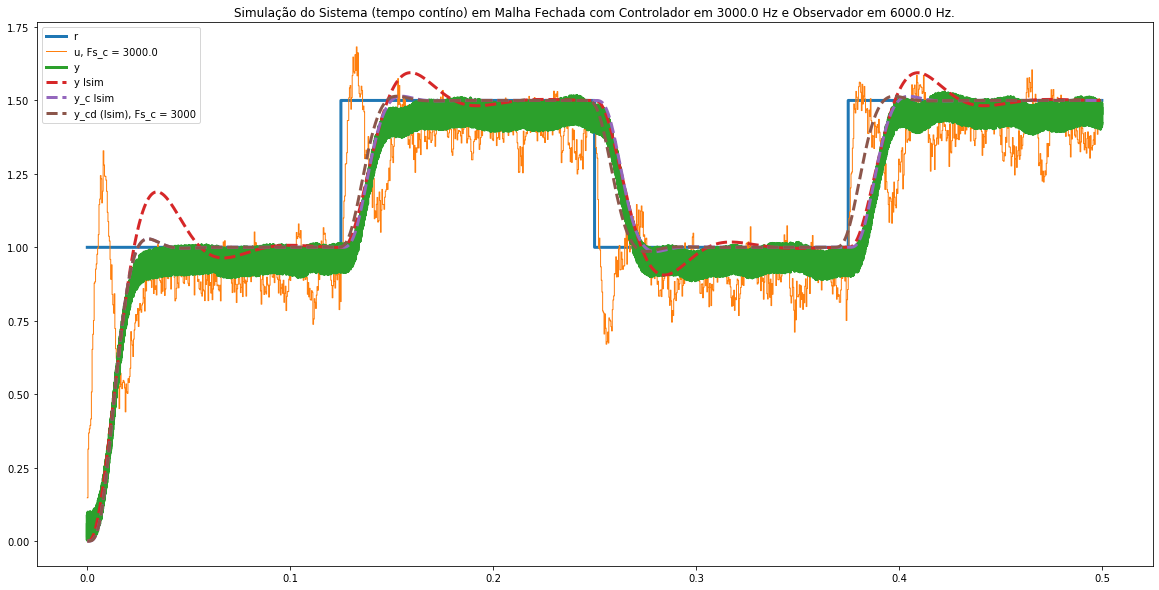

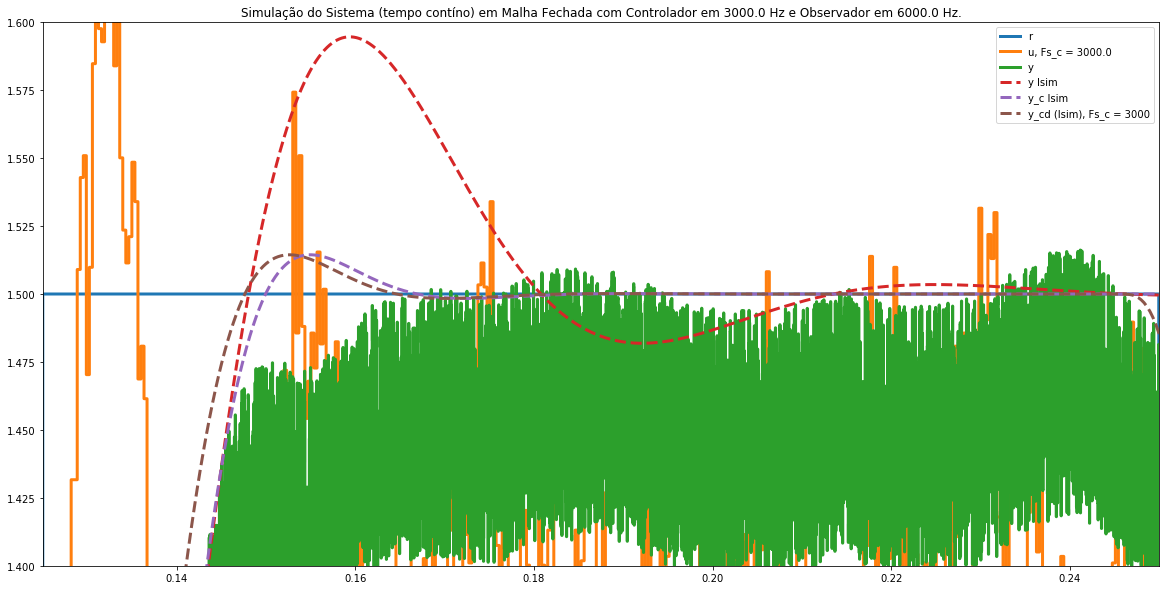

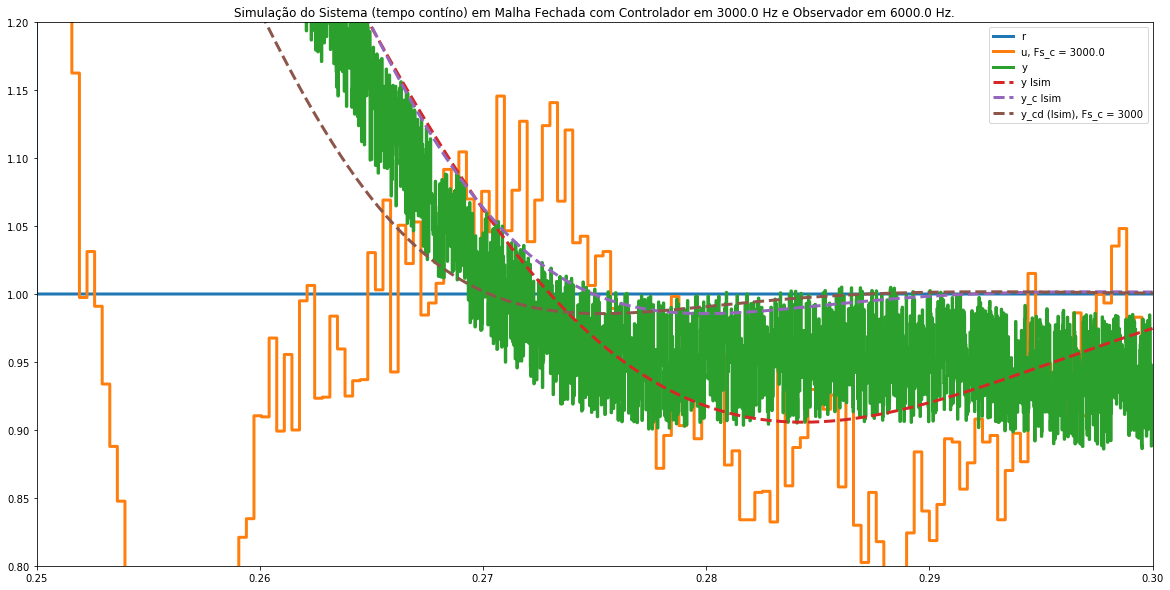

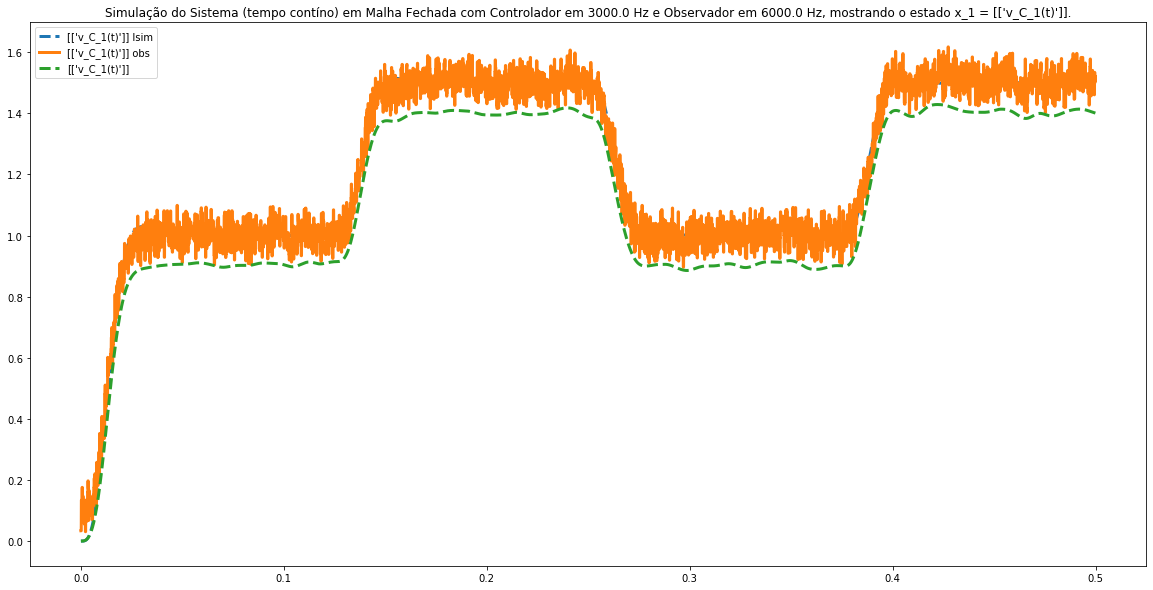

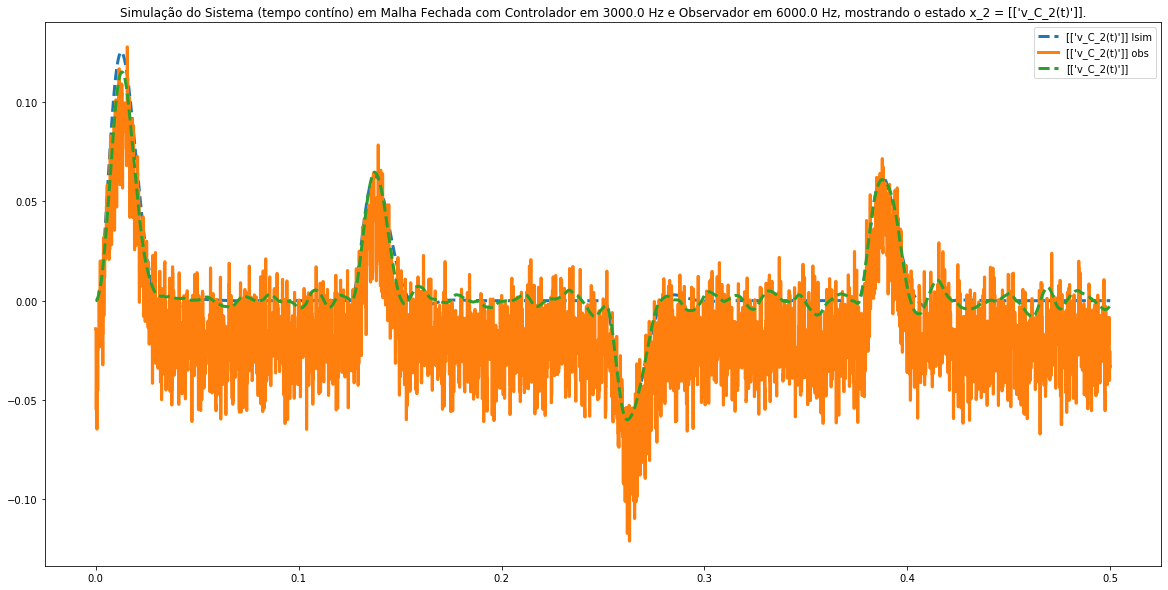

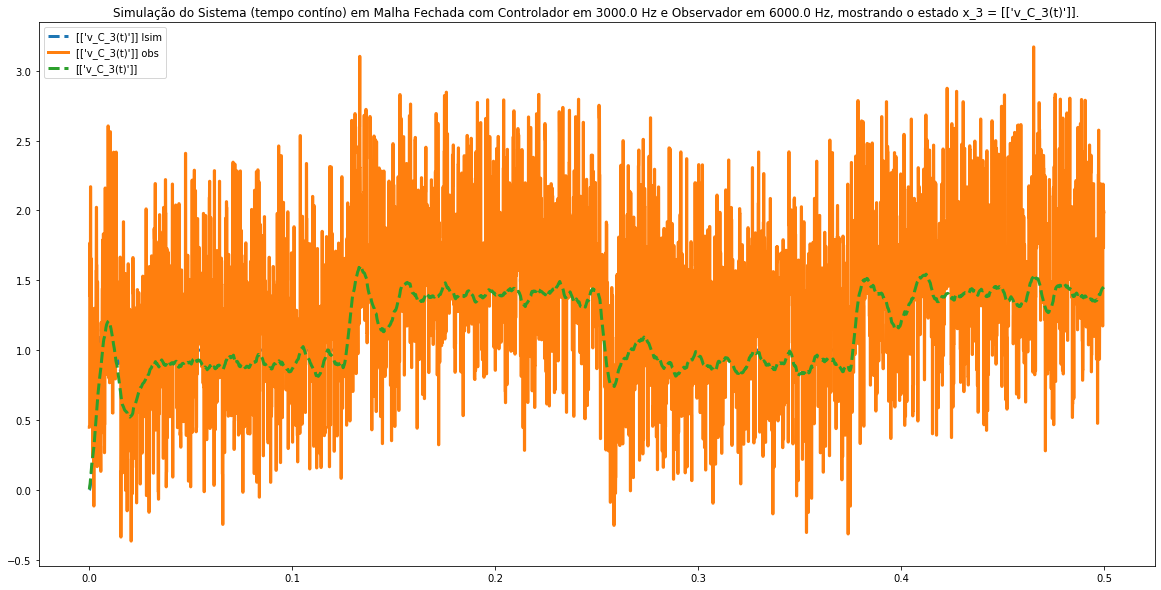

In [87]:
# Simulação Completa

import numpy as np
import matplotlib.pyplot as plt


def noise(input: np.float, amplitude: np.float = 1) -> np.float:
    ''' Ruído de nível '''
    return input + np.random.random_sample() * amplitude


def saturate(input: np.float, min_value: np.float,
             max_value: np.float) -> np.float:
    ''' Saturador de nível '''
    output = min([max(input, min_value), max_value])
    return output


def quantize(input: np.float, number_of_bits: np.uint,
             max_value: np.float) -> np.float:
    ''' Quantizador de nível '''
    max_bits_value = 2.**number_of_bits
    ratio = (max_bits_value) / max_value
    converted = input * ratio
    output = np.ceil(saturate(converted, 0, max_bits_value)) / ratio
    return output


# Período do passo de simulação
Ts = 2e-5
# Tempo em alto do sinal aplicado
pulse_time = 250e-3
# Número de ciclos do sinal aplicado
pulse_cycles = 2

# Cria o sinal de tempo de simulação
T = np.arange(pulse_time * pulse_cycles / Ts) * Ts
kmax = T.size

# Cria sinal de degrau de entrada, de nível arbitrário (1V para 1.5V)
U = np.array([
    *[
        *np.ones(int(np.ceil(kmax / (2 * pulse_cycles)))),
        *np.ones(int(np.ceil(kmax / (2 * pulse_cycles)))) * 1.5
    ] * pulse_cycles
])[0:kmax]

# Nível de ruído (em volts) na saída da planta
y_noise_level = 100e-3

# Variáveis do ADC e DAC:
badc = 12  # ADC de quantos bits?
vadc = 3  # Qual a tensão máxima do ADC?
bdac = 12  # DAC de quantos bits?
vdac = 3.3  # Qual a tensão máxima do DAC?

# Variáveis para armazenar as amostras para plotagem
r_ = U
u_ = np.zeros(len(r_))
x_ = np.zeros([len(A), len(r_)])
xtil_ = np.zeros([len(A), len(r_)])
y_ = np.zeros(len(r_))

# Variáveis para simulação do sistema
r = 0.0
u = np.matrix(np.zeros([1, 1]))
x = np.matrix(np.zeros([len(A), 1]))
xdot = np.matrix(np.zeros([len(A), 1]))
y = np.matrix(np.zeros([1, 1]))
Tsx = Ts  # Ts é integração em tempo continuo (passo de simulação)
k = 0

# Variáveis para simulação do controlador
e = np.matrix(np.zeros([1, 1]))
edot = np.matrix(np.zeros([1, 1]))
Tse = Ts_c

# Variáveis para simulação do Observador de Ordem Mínima
ntil = np.matrix(np.zeros([len(A) - 1, 1]))
ntildot = np.matrix(np.zeros([len(A) - 1, 1]))
xtil = np.matrix(np.zeros([len(A), 1]))
Tsn = Tse / 2

# Variavel para contabilizar o tempo total simulado
Ts_ = 0
print(f'Ts = {Ts}')
print(f'Tsx = {Tsx}')
print(f'Tse = {Tse}')
print(f'Tsn = {Tsn}')

# Quantas vezes ocorreram ações de controle na simulação?
controller_action_counter = 0
# Quantas vezes ocorreram observações na simulação?
observer_action_counter = 0

# Divisor de clock para o Amostrador do Controlador
controller_clock_trigger = Tse / Ts
controller_clock_counter = controller_clock_trigger
print(f'controller_clock_trigger = Tse/Ts = {controller_clock_trigger}')

# Divisor de clock para o Amostrador do Observador
observer_clock_trigger = Tsn / Ts
observer_clock_counter = observer_clock_trigger
print(f'observer_clock_trigger = Tsn/Ts = {observer_clock_trigger}')

# Utilizar observador?
use_obs = True
# Utilizar controlador?
use_ctrl = True
# Utilizar ruído na saída da planta?
use_noise = True

# SIMULAÇÃ
while k < len(r_):
    # ENTRADAS DA SIMULAÇÃO
    r = r_[k]  # leitura da referência interna
    if use_noise:
        y = quantize(noise(y, y_noise_level), badc, vadc)  # leitura da saida com o ADC
    else:
        y = quantize(y, badc, vadc)  # leitura da saida com o ADC

    # OBSERVADOR DE ORDEM MÍNIMA
    if observer_clock_counter >= observer_clock_trigger:
        # reciclo do divisor de clock do observador
        observer_clock_counter = 0
        observer_action_counter += 1

        ntildot_1 = Fhat_o * u
        ntildot_2 = Bhat_o * y
        ntildot_3 = Ahat_o * ntil
        ntildot = ntildot_1 + ntildot_2 + ntildot_3
        ntil = ntil + Tsn * ntildot

        # TRANSFORMAÇÃO
        xtil_1 = Chat_o * ntil
        xtil_2 = Dhat_o * y
        xtil = xtil_1 + xtil_2

    # CONTROLADOR
    if controller_clock_counter >= controller_clock_trigger:
        # reciclo do divisor de clock do controlador
        controller_clock_counter = 0
        controller_action_counter += 1

        edot = r - y
        e = e + Tse * edot
        if use_obs:
            u = e * Ki - K * xtil
        else:
            u = e * Ki - K * x

    if not use_ctrl:
        u = r
    else:
        u = quantize(u, bdac, vdac)

    # PLANTA
    xdot = A * x + B * u
    x = x + Tsx * xdot
    y = C * x + D * u

    # Ruido na planta:
    if use_noise:
        y = noise(y, y_noise_level)

    # SAÍDAS DA SIMULAÇÃO
    x_[:, k] = x.ravel()
    xtil_[:, k] = xtil.ravel()
    u_[k] = u
    y_[k] = y

    # RECICLO DA SIMULAÇÃO
    k += 1
    controller_clock_counter += 1
    observer_clock_counter += 1
    Ts_ += Ts

# Verificação do Tempo simulado
print(f'Ts_/Ts = {Ts_/Ts} = k = {k}')
# Verificação das ações de controle
print(
    f'controller_action_counter = {controller_action_counter} = k/controller_clock_trigger = {k/controller_clock_trigger}'
)
# Verificação das observações
print(
    f'observer_action_counter = {observer_action_counter} = k/observer_clock_trigger = {k/observer_clock_trigger}'
)

# PLOT DA SAÍDA
plt.figure(figsize=(20, 10))
plt.step(T, r_, lw=3, label='r')
plt.step(T, u_, lw=1, label=f'u, Fs_c = {1/Tse}')
plt.step(T, y_, lw=3, label='y')
plt.plot(T, yout, lw=3, label='y lsim', ls='--')
plt.plot(T, yout_c, lw=3, label='y_c lsim', ls='--')
plt.plot(Td, yout_cd[0], lw=3, label=f'y_cd (lsim), Fs_c = {Fs_c}', ls='--')
plt.title(
    f'Simulação do Sistema (tempo contíno) em Malha Fechada com Controlador em {1/Tse} Hz e Observador em {1/Tsn} Hz.'
)
plt.legend();
if use_noise:
    plt.savefig(f'imgs/step_response_closedloop_observer_noise.png', dpi=300)
else:
    plt.savefig(f'imgs/step_response_closedloop_observer.png', dpi=300)   

# DETALHE NO PULSO DE SUBIDA
plt.figure(figsize=(20, 10))
plt.step(T, r_, lw=3, label='r')
plt.step(T, u_, lw=3, label=f'u, Fs_c = {1/Tse}')
plt.step(T, y_, lw=3, label='y')
plt.plot(T, yout, lw=3, label='y lsim', ls='--')
plt.plot(T, yout_c, lw=3, label='y_c lsim', ls='--')
plt.plot(Td, yout_cd[0], lw=3, label=f'y_cd (lsim), Fs_c = {Fs_c}', ls='--')
plt.title(
    f'Simulação do Sistema (tempo contíno) em Malha Fechada com Controlador em {1/Tse} Hz e Observador em {1/Tsn} Hz.'
)
plt.legend()
plt.xlim([0.125, 0.25])
plt.ylim([1.4, 1.6])
if use_noise:
    plt.savefig(f'imgs/step_response_closedloop_observer_zoom_stepup_noise.png', dpi=300)
else:
    plt.savefig(f'imgs/step_response_closedloop_observer_zoom_stepup.png', dpi=300)

# DETALHE NO PULSO DE DESCIDA
plt.figure(figsize=(20, 10))
plt.step(T, r_, lw=3, label='r')
plt.step(T, u_, lw=3, label=f'u, Fs_c = {1/Tse}')
plt.step(T, y_, lw=3, label='y')
plt.plot(T, yout, lw=3, label='y lsim', ls='--')
plt.plot(T, yout_c, lw=3, label='y_c lsim', ls='--')
plt.plot(Td, yout_cd[0], lw=3, label=f'y_cd (lsim), Fs_c = {Fs_c}', ls='--')
plt.title(
    f'Simulação do Sistema (tempo contíno) em Malha Fechada com Controlador em {1/Tse} Hz e Observador em {1/Tsn} Hz.'
)
plt.legend()
plt.xlim([0.25, 0.3])
plt.ylim([0.8, 1.2])
if use_noise:
    plt.savefig(f'imgs/step_response_closedloop_observer_zoom_stepdown_noise.png', dpi=300)
else:
    plt.savefig(f'imgs/step_response_closedloop_observer_zoom_stepdown.png', dpi=300)
# PlOTS DOS ESTADOS
for x in range(0, len(A)):
    plt.figure(figsize=(20, 10))
    if use_ctrl:
        plt.plot(T, xout_c[x], lw=3, label=f'{x_label[x]} lsim', ls='--')
    else:
        plt.plot(T, xout[x], lw=3, label=f'{x_label[x]} lsim', ls='--')
    plt.plot(T, xtil_[x], lw=3, label=f'{x_label[x]} obs')
    plt.plot(T, x_[x], lw=3, label=f'{x_label[x]}', ls='--')
    plt.title(
        f'Simulação do Sistema (tempo contíno) em Malha Fechada com Controlador em {1/Tse} Hz e Observador em {1/Tsn} Hz, mostrando o estado x_{x+1} = {x_label[x]}.'
    )
    plt.legend()   
    if use_noise:
        plt.savefig(f'imgs/step_response_closedloop_observer_state{x+1}_noise.png', dpi=300)
    else:
        plt.savefig(f'imgs/step_response_closedloop_observer_state{x+1}.png', dpi=300)

# Destroi variaveis utilizadas
del r_, u_, x_, xtil_, y_
del r, u, x, y, e, xdot, edot, k, ntil, ntildot, xtil

# Geração de código C

In [75]:
# FORMATADORES DE VARIAVEIS
def export_c(name: str, variable=None) -> str:
    ''' Exporta a variáveis em sintaxe C '''

    def export_c_matrix(name: str, matrix: np.matrix) -> str:
        rows, cols = matrix.shape
        formatted = f"{name}[{rows}][{cols}] = {{\n\t{{"
        for i in range(rows):
            for j in range(cols):
                formatted += "{0:^10.06G}".format(matrix[i, j])
                if j < cols - 1:
                    formatted += ',\t'
                else:
                    if i < rows - 1:
                        formatted += '},\n\t{'
                    else:
                        formatted += '}\n};\n'
        return formatted

    def export_c_linearray(name: str, matrix: np.matrix) -> str:
        rows, cols = matrix.shape
        formatted = f"{name}[{rows}][{cols}] = {{{{"
        for i in range(rows):
            for j in range(cols):
                formatted += "{0:.06G}".format(matrix[i, j])
                if j < cols - 1:
                    formatted += ',\t'
                else:
                    formatted += '}};\n'
        return formatted

    def export_c_number(name: str, variable) -> str:
        return f"{name} = {variable};\n"

    def export_c_title(title: str, fillchar: str) -> str:
        return '\n' + fillchar * 80 + '\n{s:{c}^80} \n'.format(
            s=title, c=fillchar) + fillchar * 80 + '\n'

    def export_c_string(string: str) -> str:
        return string + '\n'

    if variable is None:
        return export_c_string(name)
    elif type(variable) is np.matrix:
        if len(variable) is 1:
            return export_c_linearray(name, variable)
        else:
            return export_c_matrix(name, variable)
    elif type(variable) is str:
        return export_c_title(name, variable)
    else:
        return export_c_number(name, variable)

In [76]:
## file: ss.h
c_header__ss_h_ = ''

c_header__ss_h_ += export_c('#ifndef _SS_H_')
c_header__ss_h_ += export_c('#define _SS_H_')
c_header__ss_h_ += '\n'

c_header__ss_h_ += export_c(' CONSTANTES DA PLANTA ', '/')
c_header__ss_h_ += export_c('const float A', A)
c_header__ss_h_ += export_c('const float B', B)
c_header__ss_h_ += export_c('const float C', C)
c_header__ss_h_ += export_c('const float D', D)

c_header__ss_h_ += export_c(' CONSTANTES DA CONTROLADOR ', '/')
c_header__ss_h_ += export_c('const float K', K)
c_header__ss_h_ += export_c('const float Ki', Ki)
c_header__ss_h_ += export_c('const float Tse', Tse)
c_header__ss_h_ += export_c('const float Fse', int(np.ceil(1 / Tse)))

c_header__ss_h_ += export_c(' CONSTANTES DA OBSERVADOR ', '/')
c_header__ss_h_ += export_c('const float Ahat_o', Ahat_o)
c_header__ss_h_ += export_c('const float Bhat_o', Bhat_o)
c_header__ss_h_ += export_c('const float Chat_o', Chat_o)
c_header__ss_h_ += export_c('const float Dhat_o', Dhat_o)
c_header__ss_h_ += export_c('const float Fhat_o', Fhat_o)
c_header__ss_h_ += export_c('const float Ke', Ke)
c_header__ss_h_ += export_c('const float Tsn', Tsn)
c_header__ss_h_ += export_c('const float Fsn', int(np.ceil(1 / Tsn)))

c_header__ss_h_ += export_c(' VARIAVEIS ', '/')
c_header__ss_h_ += export_c('volatile float r', np.matrix(np.zeros([1, 1])))
c_header__ss_h_ += export_c('volatile float u', np.matrix(np.zeros([1, 1])))
c_header__ss_h_ += export_c('volatile float y', np.matrix(np.zeros([1, 1])))
c_header__ss_h_ += export_c('volatile float x', np.matrix(np.zeros([len(A),
                                                                    1])))
c_header__ss_h_ += export_c('volatile float xdot',
                            np.matrix(np.zeros([len(A), 1])))
c_header__ss_h_ += export_c('volatile float xtil',
                            np.matrix(np.zeros([len(A), 1])))
c_header__ss_h_ += export_c('volatile float ntil',
                            np.matrix(np.zeros([len(A) - 1, 1])))
c_header__ss_h_ += export_c('volatile float ntildot',
                            np.matrix(np.zeros([len(A) - 1, 1])))
c_header__ss_h_ += export_c('volatile float e', np.matrix(np.zeros([1, 1])))
c_header__ss_h_ += export_c('volatile float edot', np.matrix(np.zeros([1, 1])))
c_header__ss_h_ += '\n\n'
c_header__ss_h_ += export_c('#endif /*_SS_H_*/')

print(c_header__ss_h_)

#ifndef _SS_H_
#define _SS_H_


////////////////////////////////////////////////////////////////////////////////
///////////////////////////// CONSTANTES DA PLANTA ///////////////////////////// 
////////////////////////////////////////////////////////////////////////////////
const float A[3][3] = {
	{    0     ,	 559.441  ,	    0     },
	{ -21.0084 ,	 -100.928 ,	 21.0084  },
	{    0     ,	    0     ,	 -666.667 }
};
const float B[3][1] = {
	{    0     },
	{    0     },
	{ 666.667  }
};
const float C[1][3] = {{1,	0,	0}};
const float D[1][1] = {{0}};

////////////////////////////////////////////////////////////////////////////////
////////////////////////// CONSTANTES DA CONTROLADOR /////////////////////////// 
////////////////////////////////////////////////////////////////////////////////
const float K[1][3] = {{4.16654,	11.753,	0.00529644}};
const float Ki = 386.12694507724626;
const float Tse = 0.0003333333333333333;
const float Fse = 3000;

///////////////////////////////////////////

In [77]:
control.damp(sys_c)

_____Eigenvalue______ Damping___ Frequency_
    -128.5    +171.1j     0.6006        214
    -128.5    -171.1j     0.6006        214
      -257    +1.711j          1        257
      -257    -1.711j          1        257


(array([213.98294063, 213.98294063, 257.0477294 , 257.0477294 ]),
 array([0.60061338, 0.60061338, 0.99997785, 0.99997785]),
 array([-128.52101782+171.08783376j, -128.52101782-171.08783376j,
        -257.04203564  +1.71087834j, -257.04203564  -1.71087834j]))